In [1]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('insurance.csv')

print("First 5 Rows:")
print(df.head())

print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns)


First 5 Rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Shape: (1338, 7)

Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [4]:
df = pd.get_dummies(df, drop_first=True)

print("\nAfter Encoding:")
print(df.head())



After Encoding:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [5]:
X = df.drop('charges', axis=1)
y = df['charges']

print("X Shape:", X.shape)
print("y Shape:", y.shape)


X Shape: (1338, 8)
y Shape: (1338,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (936, 8)
Testing Set Shape: (402, 8)


In [10]:


regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Model Intercept:", regressor.intercept_)
print("Model Coefficients:", regressor.coef_)


Model Intercept: -11835.309682878767
Model Coefficients: [  256.43544682   335.36907276   472.70978916   -47.54675517
 23435.99116948  -561.90114536  -994.74867954  -799.44893726]


In [11]:
y_pred = regressor.predict(X_test)

print("First 5 Predictions:")
print(y_pred[:5])


First 5 Predictions:
[11253.1936458   9544.90709422 37849.80104825 16069.2696851
  6734.40872284]


In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.7909160991789905
MAE: 4011.4496793279827
MSE: 33342497.82695457


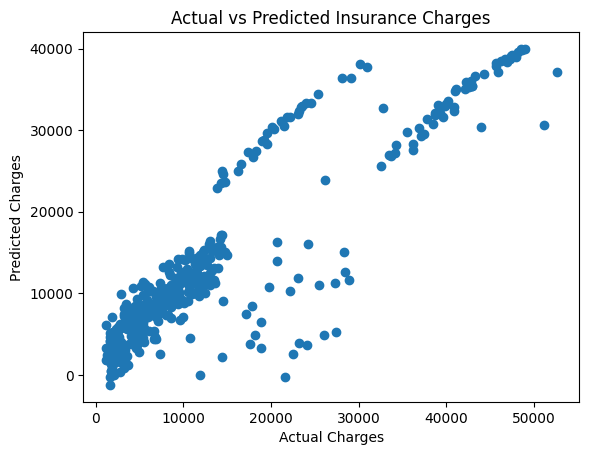

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()
